### Zadanie 1.
Przedstaw kazde z ponizszych równan rózniczkowych zwyczajnych
jako równowazny układ równan pierwszego rzedu (ang. first-order system of
ODEs):

#### a) równanie Van der Pol'a:
$$ y'' = y'(1-y^2)-y $$
\
$$ y_1 = y $$
$$ y_2 = y' $$
\
$$ y'_1 = y_2 $$
$$ y'_2 = y_2(1-y^2_1) - y_1 $$

#### b) równanie Blasiusa:
$$ y''' = -yy'' $$
\
$$ y_1 = y $$
$$ y_2 = y' $$
$$ y_3 = y'' $$
\
$$ y'_1 = y_2 $$
$$ y'_2 = y_3 $$
$$ y'_3 = -y_1y_3 $$

#### c) II zasada dynamiki Newtona dla problemu dwóch ciał:
$$ y''_1 = \frac{-GMy_1}{(y^2_1+y^2_2)^\frac{3}{2}} $$
$$ y''_2 = \frac{-GMy_2}{(y^2_1+y^2_2)^\frac{3}{2}} $$
\
$$ y'_1 = y_3 $$
$$ y'_2 = y_4 $$
\
$$ y'_3 = \frac{-GMy_1}{(y^2_1+y^2_2)^\frac{3}{2}} $$
$$ y'_4 = \frac{-GMy_2}{(y^2_1+y^2_2)^\frac{3}{2}} $$

### Zadanie 2.
Dane jest równanie różniczkowe zwyczajne
$$ y' - -5y $$
z warunkiem początkowym $ y(0) = 1 $. Równanie rozwiązujemy numerycznie z krokiem $ h = 0.5 $.

#### a) Analityczna stabilność
Rozwiązania równania $ y' = -5y $ są stabilne, ponieważ rozwiązanie analityczne $ y(t) = y(0)e^{-5t} $ dąży do zera gdy $ t $ rośnie.

#### b) Numeryczna stabilność - metoda Eulera
Dla metody Eulera równanie różniczkowe jest stabilne, jeśli $|1+h\lambda| ≤ 1$. Tutaj $\lambda=-5$, więc metoda Eulera będzie stabilna dla $h≤\frac{2}{5}$. Z krokiem $h = 0.5$ metoda nie jest stabilna

#### (c) Obliczenia metodą Eulera 
Metoda Eulera:
$$ y_{n+1} = y_n + hf(t_n, y_n) $$

In [15]:
def euler_method(f, y0, t0, tn, h):
    # Inicjalizacja listy wynikowej
    t_values = [t0]
    y_values = [y0]

    # Iteracja przez przedział [t0, tn] z krokiem h
    while t_values[-1] < tn:
        # Obliczenie kolejnej wartości y(t) używając metody Eulera
        y_next = y_values[-1] + h * f(t_values[-1], y_values[-1])

        t_values.append(t_values[-1] + h)
        y_values.append(y_next)

    return t_values, y_values

def f(t, y):
    return -5 * y

y0 = 1
t0 = 0
tn = 0.5
h = 0.5

t_values, y_values = euler_method(f, y0, t0, tn, h)
print(f"Przybliżona wartość dla t = {tn}: y = {y_values[-1]}")

Przybliżona wartość dla t = 0.5: y = -1.5


#### b) Numeryczna stabilność - niejawna metoda Eulera
Dla niejawnej metody Eulera równanie różniczkowe jest stabilne, jeśli $|\frac{1}{1-h\lambda}| ≤ 1$. Tutaj $\lambda=-5$, więc niejawna metoda Eulera będzie stabila dla $h > 0$. Oznacza to, że z krokiem $h = 0.5$ metoda ta jest stabilna.

#### (c) Obliczenia niejawną metodą Eulera 

In [16]:
from scipy.optimize import fsolve

def implicit_euler_method(f, y0, t0, tn, h):
    t_values = [t0]
    y_values = [y0]

    # Iteracja przez przedział [t0, tn] z krokiem h
    while t_values[-1] < tn:
        # Rozwiązanie równania nieliniowego dla y_{n+1} przy użyciu fsolve
        y_next = fsolve(lambda y: y - y_values[-1] - h * f(t_values[-1] + h, y), y_values[-1])[0]
        
        t_values.append(t_values[-1] + h)
        y_values.append(y_next)

    return t_values[-1], y_values[-1]

def f(t, y):
    return -5 * y

y0 = 1
t0 = 0
tn = 0.5
h = 0.5

t_target, y_target = implicit_euler_method(f, y0, t0, tn, h)
print(f"Przybliżona wartość dla t = {t_target}: y = {y_target}")

Przybliżona wartość dla t = 0.5: y = 0.2857142857142857


### Zadanie 3

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parametry modelu
beta = 1
gamma = 1/7

# Warunki początkowe
S0 = 762
I0 = 1
R0 = 0
N = S0 + I0 + R0

# Krok czasowy
h = 0.2
T = 14

# Funkcje pochodnych
def dS_dt(S, I, R):
    return -beta * S * I / N

def dI_dt(S, I, R):
    return beta * S * I / N - gamma * I

def dR_dt(S, I, R):
    return gamma * I

# Liczba kroków
steps = int(T / h)

# Inicjalizacja tablic
t_values = np.linspace(0, T, steps+1)
S_values = np.zeros(steps+1)
I_values = np.zeros(steps+1)
R_values = np.zeros(steps+1)

# Ustawienie wartości początkowych
S_values[0] = S0
I_values[0] = I0
R_values[0] = R0

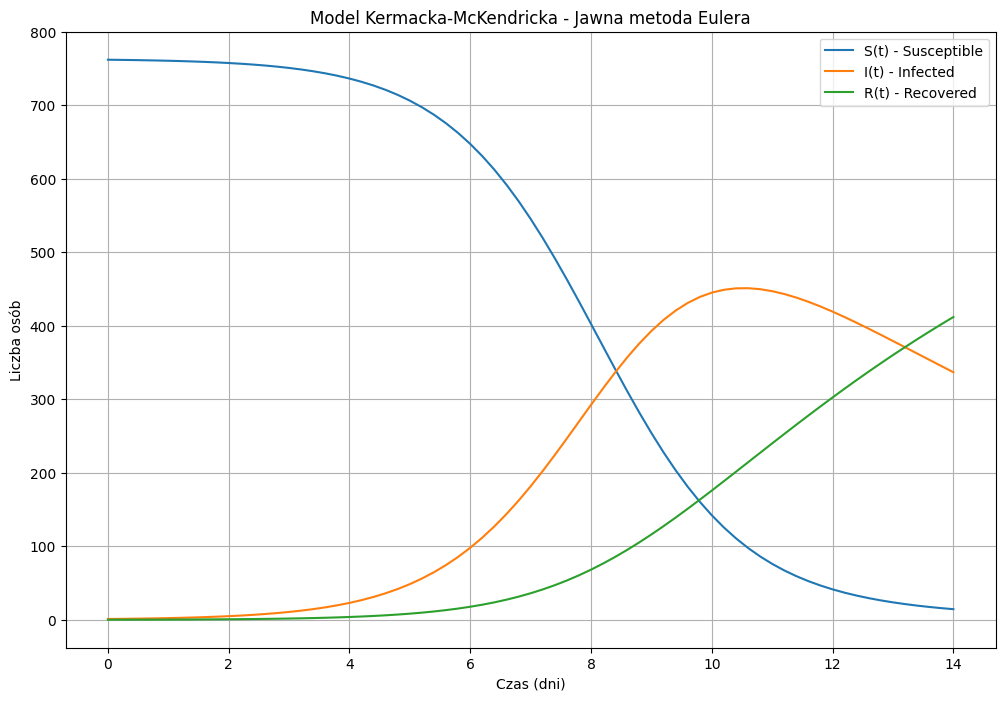

In [19]:
# Metoda Eulera
for k in range(steps):
    S_values[k+1] = S_values[k] + h * dS_dt(S_values[k], I_values[k], R_values[k])
    I_values[k+1] = I_values[k] + h * dI_dt(S_values[k], I_values[k], R_values[k])
    R_values[k+1] = R_values[k] + h * dR_dt(S_values[k], I_values[k], R_values[k])

# Wykresy dla jawnej metody Eulera
plt.figure(figsize=(12, 8))
plt.plot(t_values, S_values, label='S(t) - Susceptible')
plt.plot(t_values, I_values, label='I(t) - Infected')
plt.plot(t_values, R_values, label='R(t) - Recovered')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Model Kermacka-McKendricka - Jawna metoda Eulera')
plt.grid()
plt.show()

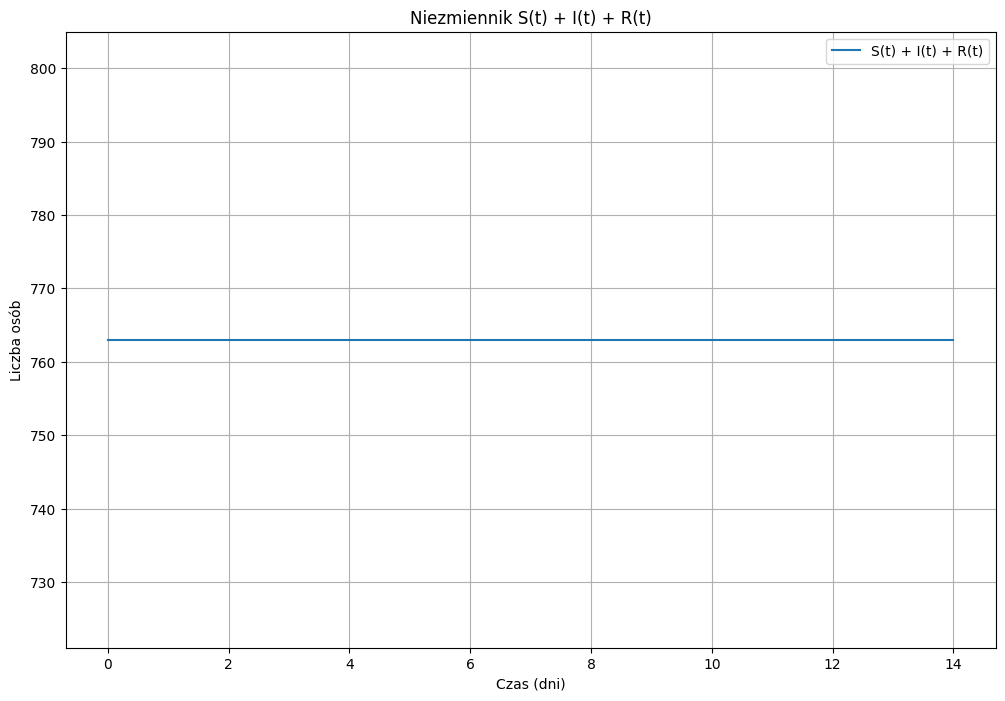

In [20]:
# Wykres sumy S + I + R
plt.figure(figsize=(12, 8))
plt.plot(t_values, S_values + I_values + R_values, label='S(t) + I(t) + R(t)')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Niezmiennik S(t) + I(t) + R(t)')
plt.grid()
plt.show()

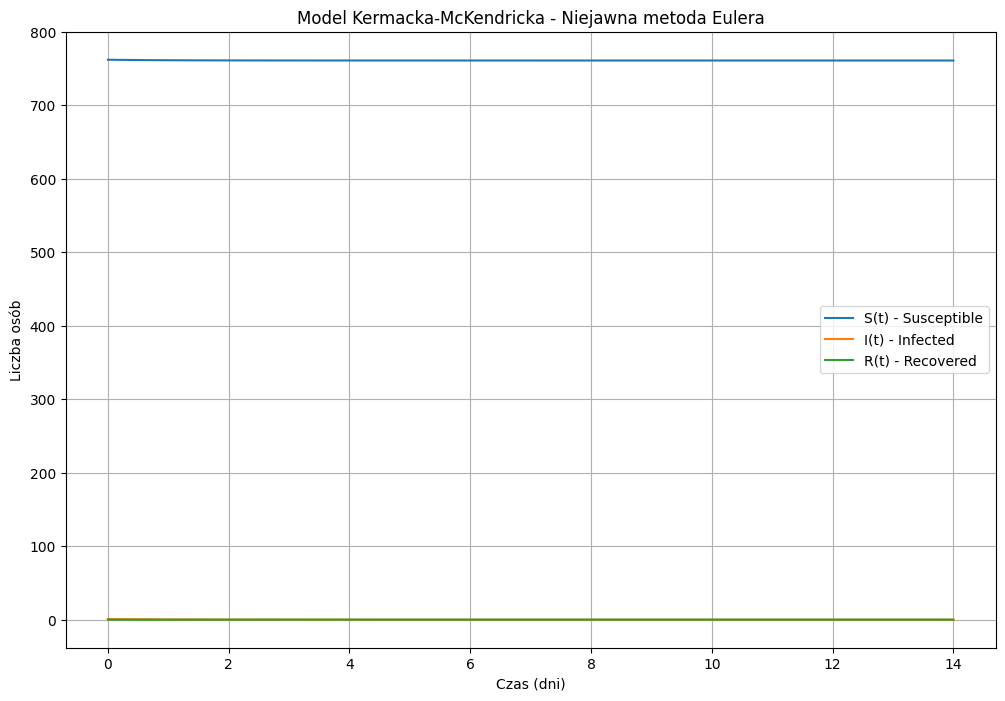

In [21]:
# Niejawna metoda Eulera
S_values_implicit = np.zeros(steps+1)
I_values_implicit = np.zeros(steps+1)
R_values_implicit = np.zeros(steps+1)

# Ustawienie wartości początkowych
S_values_implicit[0] = S0
I_values_implicit[0] = I0
R_values_implicit[0] = R0

# Metoda niejawna Eulera
for k in range(steps):
    S_next = S_values_implicit[k] / (1 + h * beta * I_values_implicit[k] / N)
    I_next = I_values_implicit[k] / (1 + h * (gamma + beta * S_values_implicit[k] / N))
    R_next = R_values_implicit[k] + h * gamma * I_next
    
    S_values_implicit[k+1] = S_next
    I_values_implicit[k+1] = I_next
    R_values_implicit[k+1] = R_next

# Wykresy dla niejawnej metody Eulera
plt.figure(figsize=(12, 8))
plt.plot(t_values, S_values_implicit, label='S(t) - Susceptible')
plt.plot(t_values, I_values_implicit, label='I(t) - Infected')
plt.plot(t_values, R_values_implicit, label='R(t) - Recovered')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Model Kermacka-McKendricka - Niejawna metoda Eulera')
plt.grid()
plt.show()

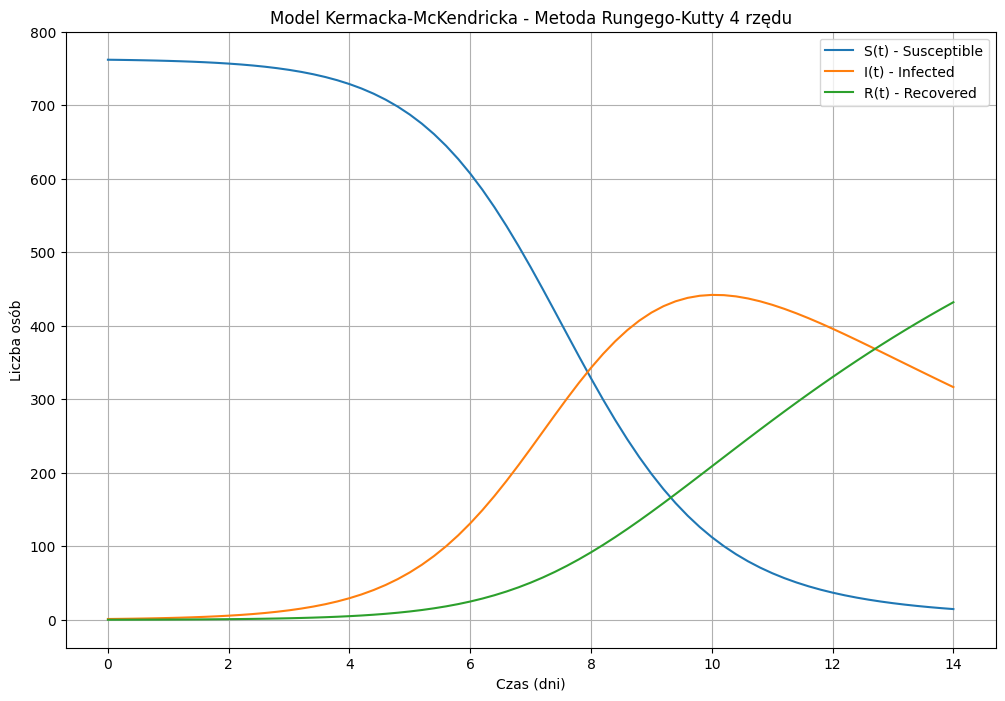

In [22]:
# Metoda Rungego-Kutty czwartego rzędu (RK4)
S_values_rk4 = np.zeros(steps+1)
I_values_rk4 = np.zeros(steps+1)
R_values_rk4 = np.zeros(steps+1)

# Ustawienie wartości początkowych
S_values_rk4[0] = S0
I_values_rk4[0] = I0
R_values_rk4[0] = R0

# Metoda RK4
for k in range(steps):
    S_k, I_k, R_k = S_values_rk4[k], I_values_rk4[k], R_values_rk4[k]
    
    k1_S = h * dS_dt(S_k, I_k, R_k)
    k1_I = h * dI_dt(S_k, I_k, R_k)
    k1_R = h * dR_dt(S_k, I_k, R_k)
    
    k2_S = h * dS_dt(S_k + k1_S / 2, I_k + k1_I / 2, R_k + k1_R / 2)
    k2_I = h * dI_dt(S_k + k1_S / 2, I_k + k1_I / 2, R_k + k1_R / 2)
    k2_R = h * dR_dt(S_k + k1_S / 2, I_k + k1_I / 2, R_k + k1_R / 2)
    
    k3_S = h * dS_dt(S_k + k2_S / 2, I_k + k2_I / 2, R_k + k2_R / 2)
    k3_I = h * dI_dt(S_k + k2_S / 2, I_k + k2_I / 2, R_k + k2_R / 2)
    k3_R = h * dR_dt(S_k + k2_S / 2, I_k + k2_I / 2, R_k + k2_R / 2)
    
    k4_S = h * dS_dt(S_k + k3_S, I_k + k3_I, R_k + k3_R)
    k4_I = h * dI_dt(S_k + k3_S, I_k + k3_I, R_k + k3_R)
    k4_R = h * dR_dt(S_k + k3_S, I_k + k3_I, R_k + k3_R)
    
    S_values_rk4[k+1] = S_k + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
    I_values_rk4[k+1] = I_k + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
    R_values_rk4[k+1] = R_k + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

# Wykresy dla metody RK4
plt.figure(figsize=(12, 8))
plt.plot(t_values, S_values_rk4, label='S(t) - Susceptible')
plt.plot(t_values, I_values_rk4, label='I(t) - Infected')
plt.plot(t_values, R_values_rk4, label='R(t) - Recovered')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Model Kermacka-McKendricka - Metoda Rungego-Kutty 4 rzędu')
plt.grid()
plt.show()

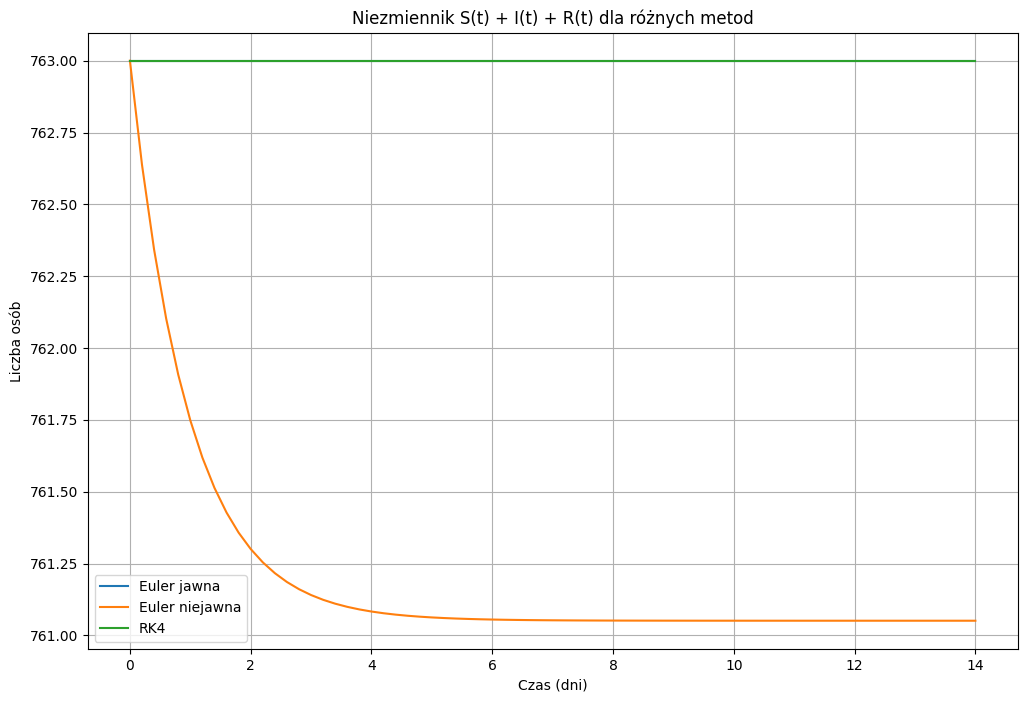

In [23]:
# Wykres sumy S + I + R dla wszystkich metod
plt.figure(figsize=(12, 8))
plt.plot(t_values, S_values + I_values + R_values, label='Euler jawna')
plt.plot(t_values, S_values_implicit + I_values_implicit + R_values_implicit, label='Euler niejawna')
plt.plot(t_values, S_values_rk4 + I_values_rk4 + R_values_rk4, label='RK4')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Niezmiennik S(t) + I(t) + R(t) dla różnych metod')
plt.grid()
plt.show()

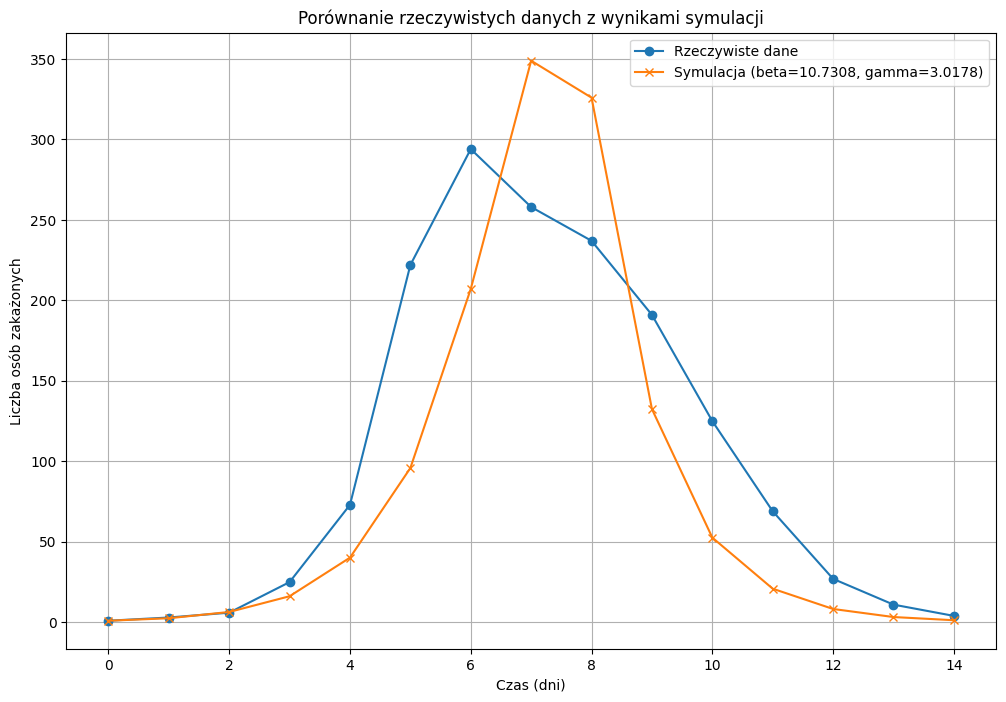

Estymowane wartości parametrów: beta=10.7308, gamma=3.0178
Współczynnik reprodukcji R0: 3.5558


In [27]:
# Dane rzeczywiste
real_I = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])
days = np.arange(0, 15)

# Estymacja parametrów modelu na podstawie danych rzeczywistych
def simulate_model(beta, gamma):
    S, I, R = S0, I0, R0
    I_values = [I0]
    for day in range(1, 15):
        S_next = S - h * beta * S * I / N
        I_next = I + h * (beta * S * I / N - gamma * I)
        R_next = R + h * gamma * I
        
        S, I, R = S_next, I_next, R_next
        I_values.append(I)
    return np.array(I_values)

# Funkcja kosztu
def cost_function(theta):
    beta, gamma = theta
    predicted_I = simulate_model(beta, gamma)
    return np.sum((real_I - predicted_I)**2)

# Inicjalizacja współczynników
theta_initial = [1, 1/7]

# Minimalizacja funkcji kosztu
result = minimize(cost_function, theta_initial, method='Nelder-Mead')
beta_est, gamma_est = result.x

# Symulacja z estymowanymi parametrami
I_estimated = simulate_model(beta_est, gamma_est)

# Wykres porównujący dane rzeczywiste z wynikami symulacji
plt.figure(figsize=(12, 8))
plt.plot(days, real_I, 'o-', label='Rzeczywiste dane')
plt.plot(days, I_estimated, 'x-', label='Symulacja (beta={:.4f}, gamma={:.4f})'.format(beta_est, gamma_est))
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób zakażonych')
plt.legend()
plt.title('Porównanie rzeczywistych danych z wynikami symulacji')
plt.grid()
plt.show()

# Wyświetlenie estymowanych parametrów
print(f"Estymowane wartości parametrów: beta={beta_est:.4f}, gamma={gamma_est:.4f}")
print(f"Współczynnik reprodukcji R0: {beta_est/gamma_est:.4f}")

C:\Users\mikos\AppData\Local\Temp\ipykernel_22144\1359153373.py:22: RuntimeWarning: invalid value encountered in log
  return -np.sum(real_I - np.log(predicted_I)) + np.sum(predicted_I)
C:\Users\mikos\AppData\Local\Temp\ipykernel_22144\1359153373.py:22: RuntimeWarning: divide by zero encountered in log
  return -np.sum(real_I - np.log(predicted_I)) + np.sum(predicted_I)


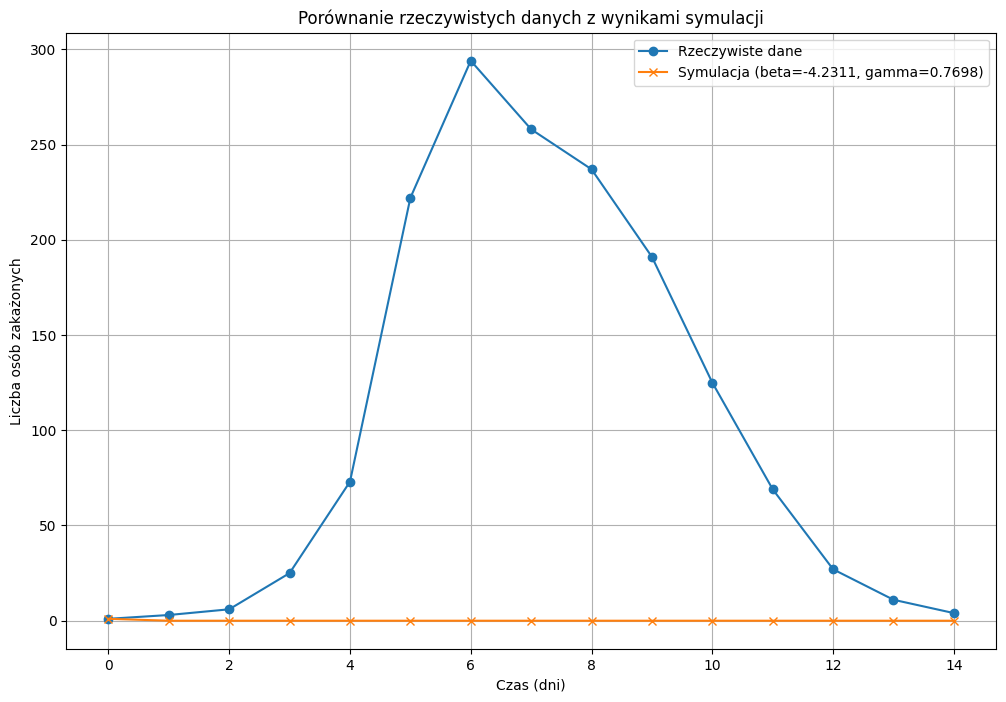

Estymowane wartości parametrów: beta=-4.2311, gamma=0.7698
Współczynnik reprodukcji R0: -5.4965


In [33]:
# Dane rzeczywiste
real_I = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])
days = np.arange(0, 15)

# Estymacja parametrów modelu na podstawie danych rzeczywistych
def simulate_model(beta, gamma):
    S, I, R = S0, I0, R0
    I_values = [I0]
    for day in range(1, 15):
        S_next = S - h * beta * S * I / N
        I_next = I + h * (beta * S * I / N - gamma * I)
        R_next = R + h * gamma * I
        
        S, I, R = S_next, I_next, R_next
        I_values.append(I)
    return np.array(I_values)

# Funkcja kosztu
def cost_function(theta):
    beta, gamma = theta
    predicted_I = simulate_model(beta, gamma)
    return -np.sum(real_I - np.log(predicted_I)) + np.sum(predicted_I)

# Inicjalizacja współczynników
theta_initial = [1, 1/7]

# Minimalizacja funkcji kosztu
result = minimize(cost_function, theta_initial, method='Nelder-Mead')
beta_est, gamma_est = result.x

# Symulacja z estymowanymi parametrami
I_estimated = simulate_model(beta_est, gamma_est)

# Wykres porównujący dane rzeczywiste z wynikami symulacji
plt.figure(figsize=(12, 8))
plt.plot(days, real_I, 'o-', label='Rzeczywiste dane')
plt.plot(days, I_estimated, 'x-', label='Symulacja (beta={:.4f}, gamma={:.4f})'.format(beta_est, gamma_est))
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób zakażonych')
plt.legend()
plt.title('Porównanie rzeczywistych danych z wynikami symulacji')
plt.grid()
plt.show()

# Wyświetlenie estymowanych parametrów
print(f"Estymowane wartości parametrów: beta={beta_est:.4f}, gamma={gamma_est:.4f}")
print(f"Współczynnik reprodukcji R0: {beta_est/gamma_est:.4f}")